In [564]:
# this are the importand includes used 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [394]:
dataset = pd.read_csv("dataSet/normalTrafficPart2Preprocessed.csv")
dataset

,Duration sec,Tx packets,Rx packets,Tx bytes,Rx bytes,status_0_1
0,"212,212,212","0,31,32","0,11,11","0,4766,4856","0,866,866","0,0,0,0"
1,"217,217,217","0,31,32","0,11,11","0,4766,4856","0,866,866","0,0,0,0"
2,"222,222,222","0,31,32","0,11,11","0,4766,4856","0,866,866","0,0,0,0"
3,"227,227,227","0,31,32","0,11,11","0,4766,4856","0,866,866","0,0,0,0"
4,"232,232,232","0,31,32","0,11,11","0,4766,4856","0,866,866","0,0,0,0"
...,...,...,...,...,...,...
1438,"741,074,107,410","0,22774,22886","0,22855,22744","0,6189003,1894713","0,1889838,6184218","0,0,0,0"
1439,"741,574,157,415","0,22774,22886","0,22855,22744","0,6189003,1894713","0,1889838,6184218","0,0,0,0"
1440,"742,074,207,420","0,22774,22886","0,22855,22744","0,6189003,1894713","0,1889838,6184218","0,0,0,0"
1441,"742,574,257,425","0,22774,22886","0,22855,22744","0,6189003,1894713","0,1889838,6184218","0,0,0,0"


In [523]:
portTxbytes = (dataset['Tx bytes'])
portTxpackets = (dataset['Tx packets'])


print(portTxbytes[0:5],portTxpackets[0:5])

print(len(portTxbytes),len(portTxpackets))


0    0,4766,4856
1    0,4766,4856
2    0,4766,4856
3    0,4766,4856
4    0,4766,4856
Name: Tx bytes, dtype: object 0    0,31,32
1    0,31,32
2    0,31,32
3    0,31,32
4    0,31,32
Name: Tx packets, dtype: object
1443 1443


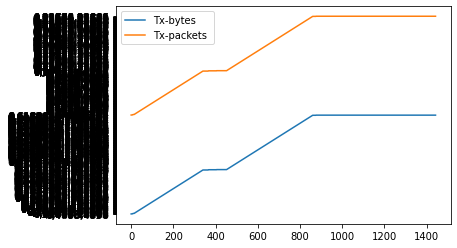

In [455]:
plt.plot(portTxbytes)
plt.plot(portTxpackets)
plt.legend(['Tx-bytes', 'Tx-packets '])

In [525]:
hostTxbytes = []
hostTxpackets =  []
for i in portTxbytes:  
    splitTins = i.split(',') 
    newArray = np.array(splitTins)    
    hostTxbytes.append(newArray)       




for j in portTxpackets:  
    split_packs = j.split(',') 
    new_split_pack = np.array(split_packs)    
    hostTxpackets.append(new_split_pack)       


print(len(hostTxbytes))
print(len(hostTxpackets))

1443
1443


In [526]:
hostTxbytes_np = np.array(hostTxbytes)
newTxBytes = hostTxbytes_np.astype(np.int)


hostTxpackets_np = np.array(hostTxpackets)
newTxPackets = hostTxpackets_np.astype(np.int)


print(newTxBytes.shape)
print("-------")
print(newTxPackets.shape)

(1443, 3)
-------
(1443, 3)


In [548]:
host1Txbytes = []
host1Txpackets = []

hostNumber = 1

for i in list(newTxBytes):
    host1Txbytes.append(i[hostNumber])
    
host1Txbytes_np = np.array(host1Txbytes)
host1Txbytes_diff = (np.diff(host1Txbytes_np))



for j in list(newTxPackets):
    host1Txpackets.append(j[hostNumber])
    
host1Txpackets_np = np.array(host1Txpackets)
host1Txpackets_diff = (np.diff(host1Txpackets_np))
    




print(host1Txbytes_diff.shape)
print("----")
print(host1Txpackets_diff.shape)       


(1442,)
----
(1442,)


Text(0.5, 1.0, 'Normal Traffic if 5 seconds interval')

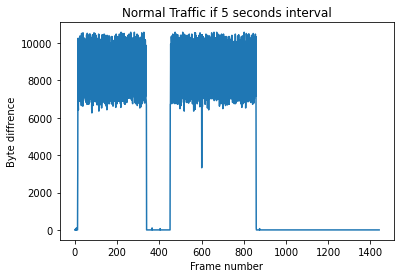

In [549]:
plt.plot(host1Txbytes_diff)

plt.xlabel('Frame number')
plt.ylabel('Byte diffrence')
plt.title("Normal Traffic if 5 seconds interval")







Text(0.5, 1.0, 'Normal Traffic if 5 seconds interval')

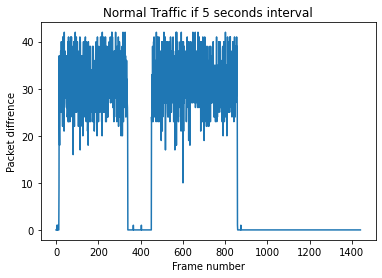

In [551]:


plt.plot(host1Txpackets_diff)
plt.xlabel('Frame number')
plt.ylabel('Packet diffrence')

plt.title("Normal Traffic if 5 seconds interval")

In [552]:
txbytesDf = pd.DataFrame(host1Txbytes_diff, columns=['Tx byte difference '])

In [530]:
txpacketsDf = pd.DataFrame(host1Txpackets_diff, columns=['Tx packets differnce'])

In [542]:
statusDF = pd.DataFrame(np.zeros(len(txbytesDf)), columns=['status'])


In [560]:

comp__ = [txbytesDf,txpacketsDf,statusDF]


result = pd.concat(comp__, axis=1, join='inner')

result


,Tx byte difference,Tx packets differnce,status
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,70,1,0.0
...,...,...,...
1437,0,0,0.0
1438,0,0,0.0
1439,0,0,0.0
1440,0,0,0.0


In [563]:
result.to_csv("dataSet/finalData.csv")